In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [74]:
#Read in the file to be used for Data Analysis

happy_by_year_df = pd.read_csv("Resources/yearly_country_data2.csv")

In [75]:
#Show the CSV pulled in from the Resource Folder

happy_by_year_df.head()

,Country,Happy,Economy,Family,Health,Freedom,Generous,Trust,Year
0,Afghanistan,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,2015
1,Afghanistan,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,2016
2,Afghanistan,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,2017
3,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,2018
4,Afghanistan,2.566900,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,2019


In [76]:
#Pull out Country and Happiness Score for each year listed

happy_by_year_df = happy_by_year_df[["Year", "Country", "Happy"]]
happy_by_year_df.head()

,Year,Country,Happy
0,2015,Afghanistan,3.982855
1,2016,Afghanistan,4.220169
2,2017,Afghanistan,2.661718
3,2018,Afghanistan,2.694303
4,2019,Afghanistan,2.566900


In [86]:
#
happy_by_year_df['diffs'] = happy_by_year_df.groupby(["Country"])["Happy"].transform(lambda x: x.diff())
happy_by_year_df


,Year,Country,Happy,diffs
0,2015,Afghanistan,3.982855,NaN
1,2016,Afghanistan,4.220169,0.237314
2,2017,Afghanistan,2.661718,-1.558450
3,2018,Afghanistan,2.694303,0.032585
4,2019,Afghanistan,2.566900,-0.127403
...,...,...,...,...
716,2015,Zimbabwe,3.703191,NaN
717,2016,Zimbabwe,3.735400,0.032209
718,2017,Zimbabwe,3.638300,-0.097100
719,2018,Zimbabwe,3.616480,-0.021820


In [77]:
#Pulled out Happiness score for year 2015

Country1_df = happy_by_year_df[happy_by_year_df["Year"] == 2015]
Country1_df

,Year,Country,Happy
0,2015,Afghanistan,3.982855
5,2015,Albania,4.606651
14,2015,Argentina,6.697131
19,2015,Armenia,4.348320
24,2015,Australia,7.309061
...,...,...,...
696,2015,Venezuela,5.568800
701,2015,Vietnam,5.076315
706,2015,Yemen,2.982674
711,2015,Zambia,4.843164


In [79]:
#Pulled out Happiness Score for year 2019

Country2_df = happy_by_year_df[happy_by_year_df["Year"] == 2019]
Country2_df

,Year,Country,Happy
4,2019,Afghanistan,2.5669
9,2019,Albania,4.8827
13,2019,Algeria,5.0051
18,2019,Argentina,5.9747
23,2019,Armenia,4.6768
...,...,...,...
700,2019,Venezuela,5.0532
705,2019,Vietnam,5.3535
710,2019,Yemen,3.5274
715,2019,Zambia,3.7594


In [89]:
#Combined the two dataframes together

country3_df = pd.concat([Country1_df, Country2_df])
country3_df

,Year,Country,Happy
0,2015,Afghanistan,3.982855
5,2015,Albania,4.606651
14,2015,Argentina,6.697131
19,2015,Armenia,4.348320
24,2015,Australia,7.309061
...,...,...,...
700,2019,Venezuela,5.053200
705,2019,Vietnam,5.353500
710,2019,Yemen,3.527400
715,2019,Zambia,3.759400


In [98]:
#Re-sorted the data frame pairing the two years together per country

country3_df.sort_values(["Country", "Year"], inplace=True)
country3_df

,Year,Country,Happy
0,2015,Afghanistan,3.982855
4,2019,Afghanistan,2.566900
5,2015,Albania,4.606651
9,2019,Albania,4.882700
13,2019,Algeria,5.005100
...,...,...,...
710,2019,Yemen,3.527400
711,2015,Zambia,4.843164
715,2019,Zambia,3.759400
716,2015,Zimbabwe,3.703191


In [99]:
#Calculate the difference between the starting year and the ending year for each country

country3_df['diffs'] = country3_df.groupby(["Country"])["Happy"].transform(lambda x: x.diff())
country3_df

,Year,Country,Happy,diffs
0,2015,Afghanistan,3.982855,NaN
4,2019,Afghanistan,2.566900,-1.415955
5,2015,Albania,4.606651,NaN
9,2019,Albania,4.882700,0.276049
13,2019,Algeria,5.005100,NaN
...,...,...,...,...
710,2019,Yemen,3.527400,0.544726
711,2015,Zambia,4.843164,NaN
715,2019,Zambia,3.759400,-1.083765
716,2015,Zimbabwe,3.703191,NaN


In [106]:
#Calculate the Country with the biggest decrease in score

Low_country_df = country3_df["diffs"].min()
Low_country_df

-1.4159545900000001

In [107]:
#Calculate the Country with the biggest increase in score

High_country_df = country3_df["diffs"].max()
High_country_df

1.8563086989999995

In [109]:
#Show the Country with the Biggest Decrease

print(country3_df[country3_df.diffs == Low_country_df])

   Year      Country   Happy     diffs
4  2019  Afghanistan  2.5669 -1.415955


In [111]:
#Show the Country with the Biggest Increase

print(country3_df[country3_df.diffs == High_country_df])

     Year  Country   Happy     diffs
363  2019  Liberia  4.5579  1.856309


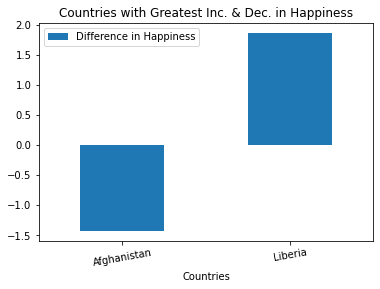

In [133]:
#Create a visualization of the data

df = pd.DataFrame({"Countries": ["Afghanistan", "Liberia"], "Difference in Happiness": [-1.42, 1.86]})
fig = df.plot.bar(x="Countries", y="Difference in Happiness", rot=10)
fig.set_title ("Countries with Greatest Inc. & Dec. in Happiness")
plt.savefig ("Analysis_Figures_Images/Countries with Greatest Inc. & Dec. in Happiness.png")